In [462]:
print('hello my project!')

hello my project!


In [463]:
import yfinance as yf
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="1y")
#display(BTC_Data)

In [464]:
import yfinance as yf
from datetime import datetime

#gold = yf.download(tickers="BTC-USD", period="5d", interval="1m")

#start = datetime(2021, 10, 18, 9, 30, 0)
#end = datetime(2021, 10, 18, 10, 30, 0)

#filtered = gold[start: end]

In [465]:
from cryptocmd import CmcScraper

# initialise scraper without time interval for max historical data
scraper = CmcScraper("BTC")
# Pandas dataFrame for the same data
df = scraper.get_dataframe()

In [466]:
# initialise scraper with time interval for e.g a year from today
from datetime import date

today = date.today()
print(today.strftime("%d-%m-%Y"))
scraper = CmcScraper("BTC", "12-12-2020", today.strftime("%d-%m-%Y"))
# Pandas dataFrame for the same data
df = scraper.get_dataframe()

28-01-2024


In [467]:
#hw test 1st and second approach but the second one is more extensive
# get raw data as list of list
headers, data = scraper.get_data()

# get data in a json format
json_data = scraper.get_data("json")

# export the data to csv
scraper.export("csv",name='data')


In [468]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap',
       'Time Open', 'Time High', 'Time Low', 'Time Close'],
      dtype='object')


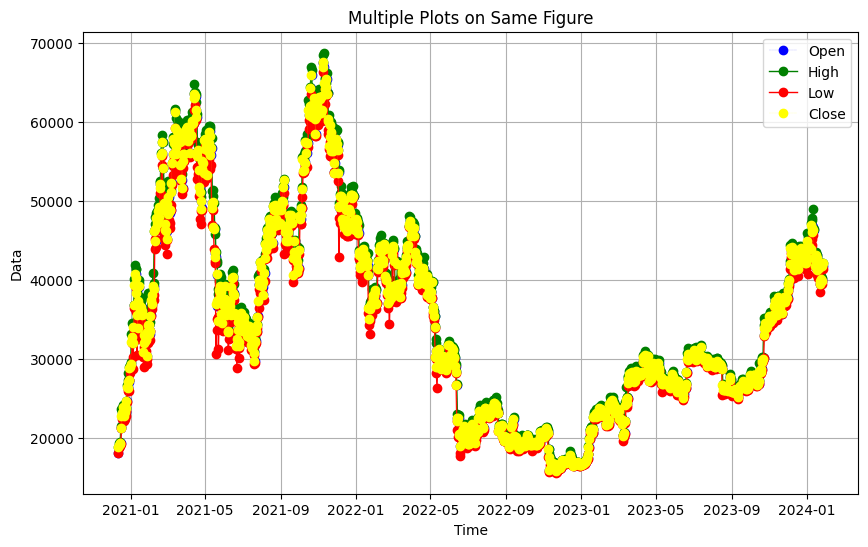

In [469]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Plot the DataFrame
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Date'], df['Open'], marker='o', lw=.1, linestyle='dashed', color='blue', label='Open')


# Plot the second dataset
ax.plot(df['Date'], df['High'], marker='o', lw=1, linestyle='-', color='green', label='High')

# Plot the third dataset
ax.plot(df['Date'], df['Low'], marker='o', lw=1, linestyle='-', color='red', label='Low')

# Plot the third dataset
ax.plot(df['Date'], df['Close'], marker='o', lw=.1 ,linestyle='dashed', color='yellow', label='Close')

# Set titles and labels
ax.set_title('Multiple Plots on Same Figure')
ax.set_xlabel('Time')
ax.set_ylabel('Data')

# Display legend
ax.legend()
plt.grid(True)
plt.show()



0
1
2
3
4


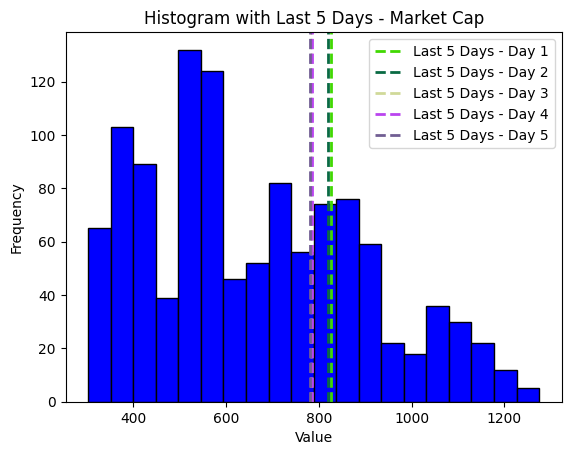

In [470]:
import numpy as np
# Plot the histogram
plt.hist(df['Market Cap']/1e9, bins=20, color='blue', edgecolor='black')

# Find the last 5 dates and corresponding values
last_5_dates = df['Date'].nlargest(5)
last_5_values = df.loc[df['Date'].isin(last_5_dates), 'Market Cap']

#latest_value = df.loc[df['Date'] == df['Date'].max(), 'Market Cap'][0]

# Generate random colors
line_colors = np.random.rand(5,3)
#print(line_colors)


# Add vertical dashed lines for the last 5 days with random colors
for i, value in enumerate(last_5_values):
    plt.axvline(x=value/1e9, color=line_colors[i], linestyle='--', linewidth=2, label=f'Last 5 Days - Day {i+1}')
    print(i)

# Set titles and labels
plt.title('Histogram with Last 5 Days - Market Cap')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display legend
plt.legend()
# Show the plot
plt.show()

In [471]:
display(df)
print(type(df['Time High']))

,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close
0,2024-01-27,41815.625020,42195.631557,41431.279894,42120.056352,1.142294e+10,8.260011e+11,2024-01-27T00:00:00.000Z,2024-01-27T22:30:00.000Z,2024-01-27T09:01:00.000Z,2024-01-27T23:59:59.999Z
1,2024-01-26,39936.816883,42209.385175,39825.692231,41816.872844,2.559812e+10,8.200114e+11,2024-01-26T00:00:00.000Z,2024-01-26T20:14:00.000Z,2024-01-26T01:11:00.000Z,2024-01-26T23:59:59.999Z
2,2024-01-25,40075.549021,40254.482323,39545.664458,39933.807752,1.849178e+10,7.830468e+11,2024-01-25T00:00:00.000Z,2024-01-25T11:30:00.000Z,2024-01-25T17:18:00.000Z,2024-01-25T23:59:59.999Z
3,2024-01-24,39877.595558,40483.783878,39508.798464,40077.073270,2.235953e+10,7.858099e+11,2024-01-24T00:00:00.000Z,2024-01-24T10:50:00.000Z,2024-01-24T20:57:00.000Z,2024-01-24T23:59:59.999Z
4,2024-01-23,39518.715453,40127.353427,38521.893888,39845.551147,2.924455e+10,7.812340e+11,2024-01-23T00:00:00.000Z,2024-01-23T04:27:00.000Z,2024-01-23T14:24:00.000Z,2024-01-23T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...
1137,2020-12-16,19418.818401,21458.907897,19298.317277,21310.598131,4.440901e+10,3.957999e+11,2020-12-16T00:00:00.000Z,2020-12-16T23:19:41.000Z,2020-12-16T00:31:39.000Z,2020-12-16T23:59:59.999Z
1138,2020-12-15,19246.919984,19525.007591,19079.842377,19417.076033,2.674198e+10,3.606148e+11,2020-12-15T00:00:00.000Z,2020-12-15T20:08:41.000Z,2020-12-15T05:19:41.000Z,2020-12-15T23:59:59.999Z
1139,2020-12-14,19144.492460,19305.100443,19012.709408,19246.644341,2.247400e+10,3.574326e+11,2020-12-14T00:00:00.000Z,2020-12-14T23:21:27.000Z,2020-12-14T01:04:41.000Z,2020-12-14T23:59:59.999Z
1140,2020-12-13,18806.766479,19381.535773,18734.332888,19142.382534,2.545047e+10,3.554792e+11,2020-12-13T00:00:00.000Z,2020-12-13T13:07:39.000Z,2020-12-13T00:40:43.000Z,2020-12-13T23:59:59.999Z


<class 'pandas.core.series.Series'>


<function matplotlib.pyplot.show(close=None, block=None)>

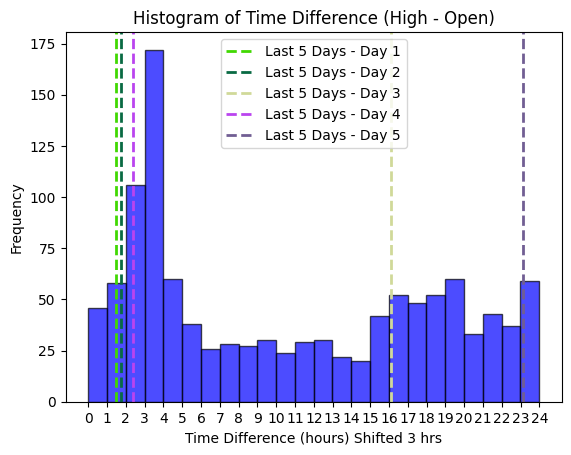

In [472]:
df_ = pd.DataFrame(df)
# Convert 'Time Open' and 'Time High' columns to datetime
df_['Time Open'] = pd.to_datetime(df['Time Open'])
df_['Time High'] = pd.to_datetime(df['Time High'])

# Calculate time difference between 'Time High' and 'Time Open'
df_['Time Difference'] = (df_['Time High'] - df_['Time Open']).dt.total_seconds() / 60 / 60  # Convert to hours
df_['Time Difference Shifted'] = (df_['Time Difference'] + 3 ) % 24
# Plot the histogram
plt.hist(df_['Time Difference Shifted'] , bins=24, color='blue', edgecolor='black', alpha=0.7)

# Add vertical dashed lines for the last 5 days
for i in range(0, 5):
    if i <= len(df):
        last_day_value = df_.iloc[-i]['Time Difference Shifted'] 
        plt.axvline(x=last_day_value, color=line_colors[i], linestyle='--', linewidth=2, label=f'Last 5 Days - Day {i+1}')

# Set titles and labels
plt.title('Histogram of Time Difference (High - Open)')
plt.xlabel('Time Difference (hours) Shifted 3 hrs')
plt.ylabel('Frequency')
plt.xticks(np.arange(25))

# Display legend
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

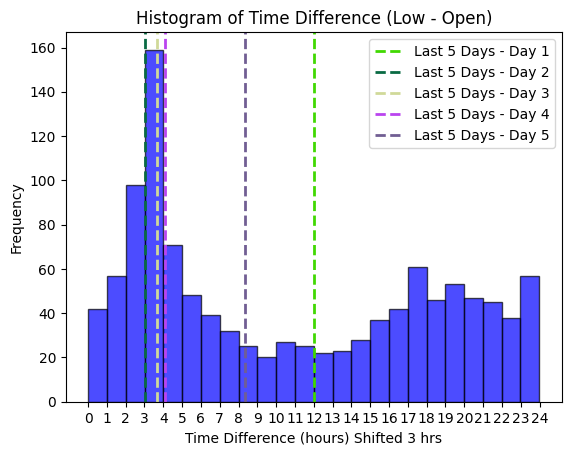

In [473]:
# Convert 'Time Open' and 'Time High' columns to datetime
df_['Time Open'] = pd.to_datetime(df['Time Open'])
df_['Time Low'] = pd.to_datetime(df['Time Low'])

# Calculate time difference between 'Time High' and 'Time Open'
df_['Time Difference Low'] = (df_['Time Low'] - df_['Time Open']).dt.total_seconds() / 60 / 60  # Convert to hours
df_['Time Difference Shifted Low'] = (df_['Time Difference Low'] + 3 ) % 24
# Plot the histogram
plt.hist(df_['Time Difference Shifted Low'] , bins=24, color='blue', edgecolor='black', alpha=0.7)

# Add vertical dashed lines for the last 5 days
for i in range(0, 5):
    if i <= len(df):
        last_day_value = df_.iloc[-i]['Time Difference Shifted Low'] 
        plt.axvline(x=last_day_value, color=line_colors[i], linestyle='--', linewidth=2, label=f'Last 5 Days - Day {i+1}')

# Set titles and labels
plt.title('Histogram of Time Difference (Low - Open)')
plt.xlabel('Time Difference (hours) Shifted 3 hrs')
plt.ylabel('Frequency')
plt.xticks(np.arange(25))

# Display legend
plt.legend()

plt.show

,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close,Delta,Mean,Sign,Percentage Delta
0,2024-01-27,41815.625020,42195.631557,41431.279894,42120.056352,1.142294e+10,8.260011e+11,2024-01-27T00:00:00.000Z,2024-01-27T22:30:00.000Z,2024-01-27T09:01:00.000Z,2024-01-27T23:59:59.999Z,764.351663,41813.455725,1,1.828004
1,2024-01-26,39936.816883,42209.385175,39825.692231,41816.872844,2.559812e+10,8.200114e+11,2024-01-26T00:00:00.000Z,2024-01-26T20:14:00.000Z,2024-01-26T01:11:00.000Z,2024-01-26T23:59:59.999Z,2383.692944,41017.538703,1,5.811399
2,2024-01-25,40075.549021,40254.482323,39545.664458,39933.807752,1.849178e+10,7.830468e+11,2024-01-25T00:00:00.000Z,2024-01-25T11:30:00.000Z,2024-01-25T17:18:00.000Z,2024-01-25T23:59:59.999Z,708.817865,39900.073391,-1,-1.776483
3,2024-01-24,39877.595558,40483.783878,39508.798464,40077.073270,2.235953e+10,7.858099e+11,2024-01-24T00:00:00.000Z,2024-01-24T10:50:00.000Z,2024-01-24T20:57:00.000Z,2024-01-24T23:59:59.999Z,974.985414,39996.291171,1,2.437690
4,2024-01-23,39518.715453,40127.353427,38521.893888,39845.551147,2.924455e+10,7.812340e+11,2024-01-23T00:00:00.000Z,2024-01-23T04:27:00.000Z,2024-01-23T14:24:00.000Z,2024-01-23T23:59:59.999Z,1605.459539,39324.623658,1,4.082581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,2020-12-16,19418.818401,21458.907897,19298.317277,21310.598131,4.440901e+10,3.957999e+11,2020-12-16T00:00:00.000Z,2020-12-16T23:19:41.000Z,2020-12-16T00:31:39.000Z,2020-12-16T23:59:59.999Z,2160.590620,20378.612587,1,10.602246
1138,2020-12-15,19246.919984,19525.007591,19079.842377,19417.076033,2.674198e+10,3.606148e+11,2020-12-15T00:00:00.000Z,2020-12-15T20:08:41.000Z,2020-12-15T05:19:41.000Z,2020-12-15T23:59:59.999Z,445.165213,19302.424984,1,2.306266
1139,2020-12-14,19144.492460,19305.100443,19012.709408,19246.644341,2.247400e+10,3.574326e+11,2020-12-14T00:00:00.000Z,2020-12-14T23:21:27.000Z,2020-12-14T01:04:41.000Z,2020-12-14T23:59:59.999Z,292.391036,19158.904925,1,1.526136
1140,2020-12-13,18806.766479,19381.535773,18734.332888,19142.382534,2.545047e+10,3.554792e+11,2020-12-13T00:00:00.000Z,2020-12-13T13:07:39.000Z,2020-12-13T00:40:43.000Z,2020-12-13T23:59:59.999Z,647.202885,19057.934331,1,3.395976


34.66262482141108


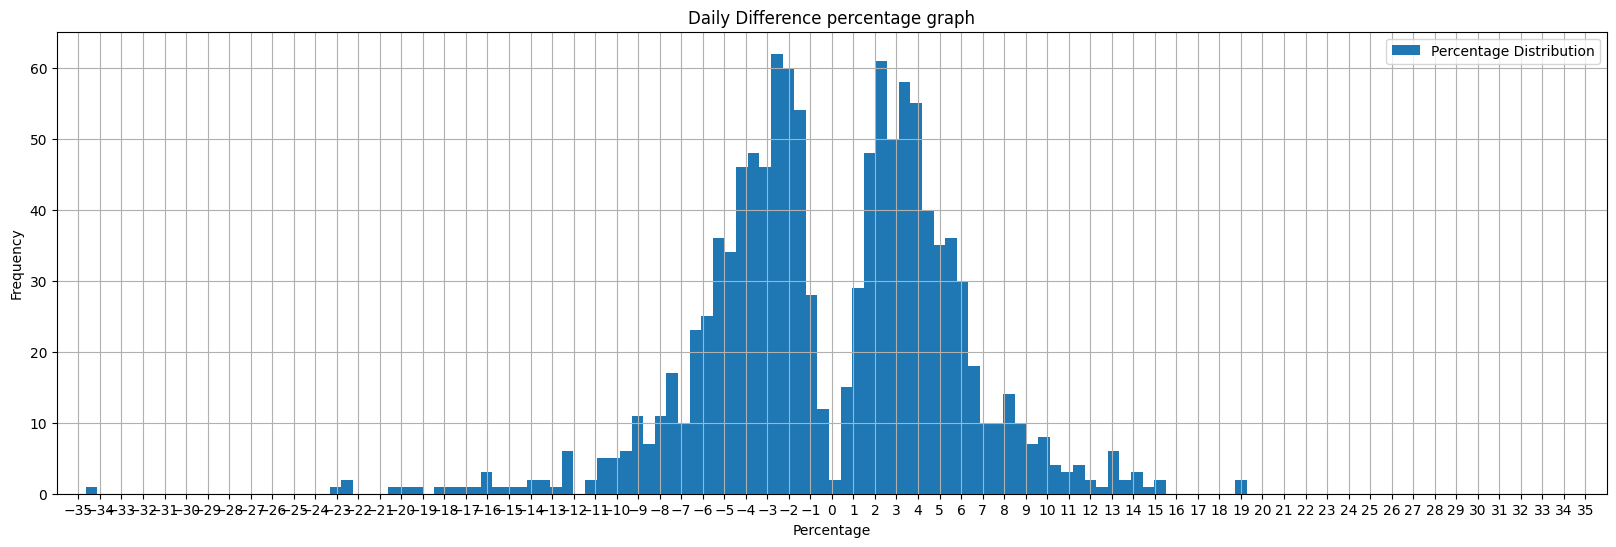

In [474]:
import numpy as np 
df['Delta'] = df['High']-df['Low']
df['Mean']  = df[['High','Low']].mean(axis = 1)
df['Sign']  = np.where(df['Close']>df['Open'],1,-1)
df['Percentage Delta'] = df['Delta']/df['Mean'] *100 * df['Sign']
display(df)
plt.figure(figsize=(20,6))
plt.hist(df['Percentage Delta'],bins=100,label=f'Percentage Distribution')

plt.title('Daily Difference percentage graph')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.xticks(np.arange(-100,100,10))
plt.xlim([-36,36])
plt.xticks(np.arange(-35,36,1))
# Display legend
plt.legend()
plt.grid()

plt.show
print(df['Percentage Delta'].abs().max())

In [475]:

#df['Percentage Delta W'] = df['Percentage Delta'].resample('W').mean()
# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Calculate the weekly average including the current week
df['Percentage Delta W'] = df['Percentage Delta'].resample('W-Mon', closed='right').mean()

# Reset the index to have 'Date' as a column again
df.reset_index(inplace=True)

# Print the resulting DataFrame
print(df)
display(df)

           Date          Open          High           Low         Close  \
0    2024-01-27  41815.625020  42195.631557  41431.279894  42120.056352   
1    2024-01-26  39936.816883  42209.385175  39825.692231  41816.872844   
2    2024-01-25  40075.549021  40254.482323  39545.664458  39933.807752   
3    2024-01-24  39877.595558  40483.783878  39508.798464  40077.073270   
4    2024-01-23  39518.715453  40127.353427  38521.893888  39845.551147   
...         ...           ...           ...           ...           ...   
1137 2020-12-16  19418.818401  21458.907897  19298.317277  21310.598131   
1138 2020-12-15  19246.919984  19525.007591  19079.842377  19417.076033   
1139 2020-12-14  19144.492460  19305.100443  19012.709408  19246.644341   
1140 2020-12-13  18806.766479  19381.535773  18734.332888  19142.382534   
1141 2020-12-12  18051.319990  18919.551228  18046.040724  18803.656870   

            Volume    Market Cap                 Time Open  \
0     1.142294e+10  8.260011e+11  202

,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close,Delta,Mean,Sign,Percentage Delta,Percentage Delta W
0,2024-01-27,41815.625020,42195.631557,41431.279894,42120.056352,1.142294e+10,8.260011e+11,2024-01-27T00:00:00.000Z,2024-01-27T22:30:00.000Z,2024-01-27T09:01:00.000Z,2024-01-27T23:59:59.999Z,764.351663,41813.455725,1,1.828004,NaN
1,2024-01-26,39936.816883,42209.385175,39825.692231,41816.872844,2.559812e+10,8.200114e+11,2024-01-26T00:00:00.000Z,2024-01-26T20:14:00.000Z,2024-01-26T01:11:00.000Z,2024-01-26T23:59:59.999Z,2383.692944,41017.538703,1,5.811399,NaN
2,2024-01-25,40075.549021,40254.482323,39545.664458,39933.807752,1.849178e+10,7.830468e+11,2024-01-25T00:00:00.000Z,2024-01-25T11:30:00.000Z,2024-01-25T17:18:00.000Z,2024-01-25T23:59:59.999Z,708.817865,39900.073391,-1,-1.776483,NaN
3,2024-01-24,39877.595558,40483.783878,39508.798464,40077.073270,2.235953e+10,7.858099e+11,2024-01-24T00:00:00.000Z,2024-01-24T10:50:00.000Z,2024-01-24T20:57:00.000Z,2024-01-24T23:59:59.999Z,974.985414,39996.291171,1,2.437690,NaN
4,2024-01-23,39518.715453,40127.353427,38521.893888,39845.551147,2.924455e+10,7.812340e+11,2024-01-23T00:00:00.000Z,2024-01-23T04:27:00.000Z,2024-01-23T14:24:00.000Z,2024-01-23T23:59:59.999Z,1605.459539,39324.623658,1,4.082581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,2020-12-16,19418.818401,21458.907897,19298.317277,21310.598131,4.440901e+10,3.957999e+11,2020-12-16T00:00:00.000Z,2020-12-16T23:19:41.000Z,2020-12-16T00:31:39.000Z,2020-12-16T23:59:59.999Z,2160.590620,20378.612587,1,10.602246,NaN
1138,2020-12-15,19246.919984,19525.007591,19079.842377,19417.076033,2.674198e+10,3.606148e+11,2020-12-15T00:00:00.000Z,2020-12-15T20:08:41.000Z,2020-12-15T05:19:41.000Z,2020-12-15T23:59:59.999Z,445.165213,19302.424984,1,2.306266,NaN
1139,2020-12-14,19144.492460,19305.100443,19012.709408,19246.644341,2.247400e+10,3.574326e+11,2020-12-14T00:00:00.000Z,2020-12-14T23:21:27.000Z,2020-12-14T01:04:41.000Z,2020-12-14T23:59:59.999Z,292.391036,19158.904925,1,1.526136,3.216062
1140,2020-12-13,18806.766479,19381.535773,18734.332888,19142.382534,2.545047e+10,3.554792e+11,2020-12-13T00:00:00.000Z,2020-12-13T13:07:39.000Z,2020-12-13T00:40:43.000Z,2020-12-13T23:59:59.999Z,647.202885,19057.934331,1,3.395976,NaN


In [501]:
#extrapolate next week but the start time is fixed in df
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

start_extrapolation_time = '2024-01-27'
# Sort DataFrame by 'Date'
df_e = df[df['Date']<start_extrapolation_time]
df_e.sort_values(by='Date', inplace = True)
#display(df_e.sort_values(by='Date', ascending=False))
#display(df)
# Extract the last 3 weeks of data
last_3_weeks = df_e.tail(21)  # Assuming 7 days per week
#print('last 3 weeks',last_3_weeks)
# Get the x values (days) and y values (Mean) for curve fitting
x_values = np.arange(len(last_3_weeks))
y_values = last_3_weeks['Mean'].values
print('\n LEngth:',len(y_values))
print('\ny values: ',y_values)
print('\nx values: ',x_values)
# Fit a linear regression model
model = LinearRegression()
model.fit(x_values.reshape(-1, 1), y_values)

display(model.coef_)
# Extrapolate the next week
next_week_days = np.arange(len(last_3_weeks), len(last_3_weeks) + 7)
extrapolated_mean = model.predict(next_week_days.reshape(-1, 1)).flatten()

# Create a DataFrame for the extrapolated values
extrapolation_df = pd.DataFrame({'Date': pd.date_range(start=last_3_weeks['Date'].max() - pd.Timedelta(days=1), periods=7),
                                 'Mean': extrapolated_mean})
display(extrapolation_df)
#display(df[df['Date'].isin(extrapolation_df['Date'].tolist())])
# Concatenate the original DataFrame and extrapolated values
df_e = pd.concat([df_e, extrapolation_df], ignore_index=True)

# Print the resulting DataFrame
#display(df_e[df_e['Date']>'2023-12-15'])


 LEngth: 21

y values:  [43851.39386893 44078.90004893 45231.0413656  46569.20807818
 46065.18592327 47324.00839865 44200.95278596 42849.40249051
 42395.10628835 42512.5697555  42826.13547576 42689.60051926
 41753.75854858 41215.80841639 41662.35850403 41676.18919283
 40550.6628927  39324.62365778 39996.2911707  39900.07339086
 41017.53870311]

x values:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


/var/folders/k3/qwrvcfl11c182b4lvntcfb8r0000gn/T/ipykernel_2059/1877693759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e.sort_values(by='Date', inplace = True)


array([-306.52615891])

,Date,Mean
0,2024-01-25,39375.393656
1,2024-01-26,39068.867497
2,2024-01-27,38762.341338
3,2024-01-28,38455.815179
4,2024-01-29,38149.289020
5,2024-01-30,37842.762861
6,2024-01-31,37536.236702


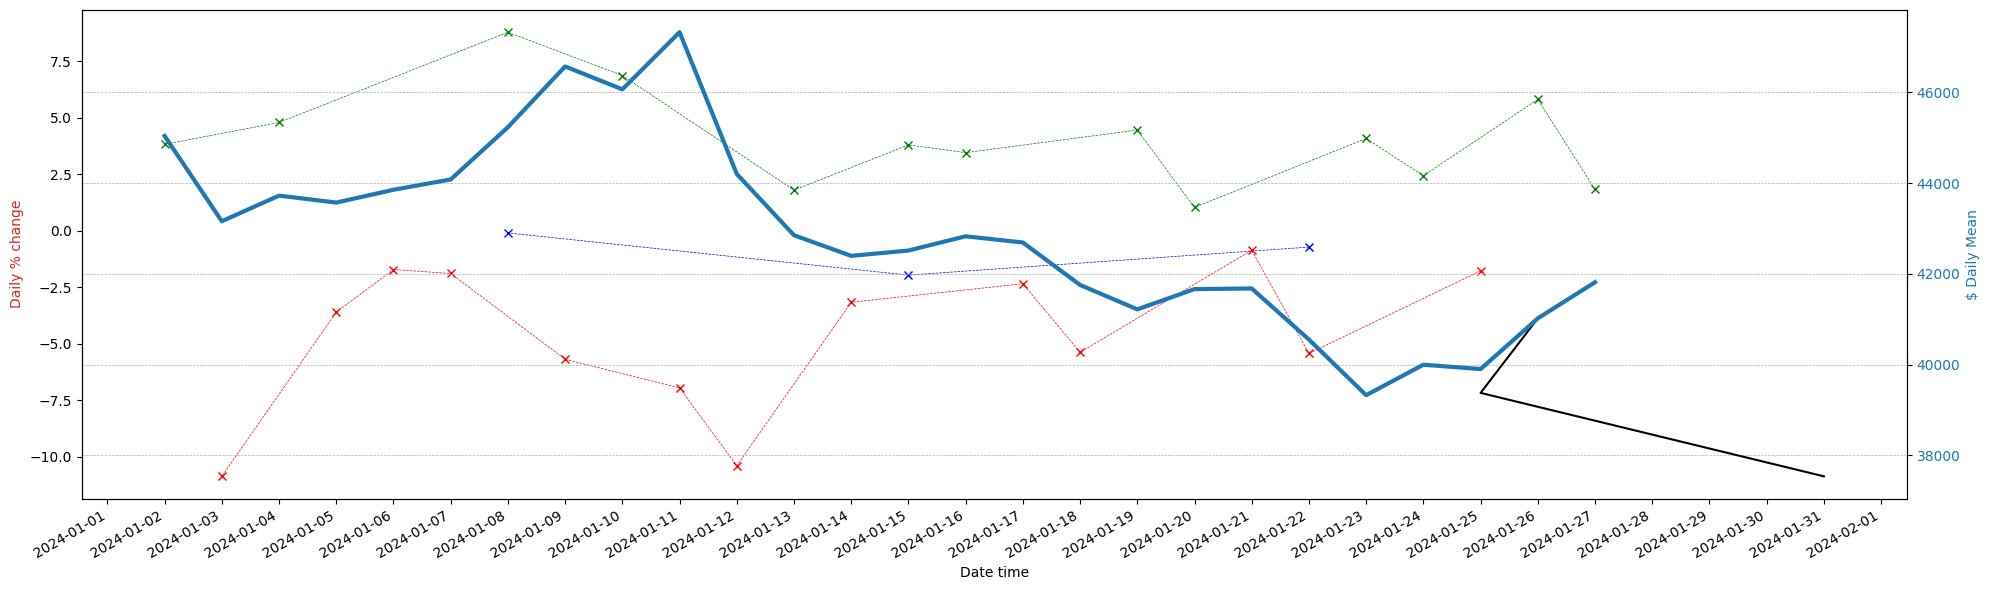

In [502]:
min_time ='2024-01-01'

df_e = df_e[df_e['Date']>min_time]#estimation data
df_new = df[df['Date']>min_time]
df_w = df.dropna()
df_w_new = df_w[df_w['Date']>min_time]
df_increase = df_new[(df_new['Percentage Delta']>0)]
df_decrease = df_new[(df_new['Percentage Delta']<0)]


fig, ax1 = plt.subplots(figsize=(20,6))

color = 'tab:red'
ax1.set_xlabel('Date time')
ax1.set_ylabel('Daily % change', color=color)

ax1.plot(df_w_new['Date'],df_w_new['Percentage Delta W'],'bx--',linewidth=0.5)
ax1.plot(df_increase['Date'],df_increase['Percentage Delta'],'gx--',linewidth=0.5)
ax1.plot(df_decrease['Date'],df_decrease['Percentage Delta'],'rx--',linewidth = 0.5)
#ax1.plot(df_w['Date'],df_w['Percentage Delta W'],'b.--',linewidth=0.5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$ Daily Mean', color=color)  # we already handled the x-label with ax1

ax2.plot(df_e['Date'],df_e['Mean'],color = 'black')
ax2.plot(df_new['Date'], df_new['Mean'], color=color,linewidth = 3)
ax2.tick_params(axis='y', labelcolor=color)

# Set daily ticks on x-axis
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())
plt.gcf().autofmt_xdate()  # Rotate and align the dates for better readability

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# Show both vertical and horizontal grids
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [503]:
display(df[df['Date']>'01-01-2023'])

,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close,Delta,Mean,Sign,Percentage Delta,Percentage Delta W
0,2024-01-27,41815.625020,42195.631557,41431.279894,42120.056352,1.142294e+10,8.260011e+11,2024-01-27T00:00:00.000Z,2024-01-27T22:30:00.000Z,2024-01-27T09:01:00.000Z,2024-01-27T23:59:59.999Z,764.351663,41813.455725,1,1.828004,NaN
1,2024-01-26,39936.816883,42209.385175,39825.692231,41816.872844,2.559812e+10,8.200114e+11,2024-01-26T00:00:00.000Z,2024-01-26T20:14:00.000Z,2024-01-26T01:11:00.000Z,2024-01-26T23:59:59.999Z,2383.692944,41017.538703,1,5.811399,NaN
2,2024-01-25,40075.549021,40254.482323,39545.664458,39933.807752,1.849178e+10,7.830468e+11,2024-01-25T00:00:00.000Z,2024-01-25T11:30:00.000Z,2024-01-25T17:18:00.000Z,2024-01-25T23:59:59.999Z,708.817865,39900.073391,-1,-1.776483,NaN
3,2024-01-24,39877.595558,40483.783878,39508.798464,40077.073270,2.235953e+10,7.858099e+11,2024-01-24T00:00:00.000Z,2024-01-24T10:50:00.000Z,2024-01-24T20:57:00.000Z,2024-01-24T23:59:59.999Z,974.985414,39996.291171,1,2.437690,NaN
4,2024-01-23,39518.715453,40127.353427,38521.893888,39845.551147,2.924455e+10,7.812340e+11,2024-01-23T00:00:00.000Z,2024-01-23T04:27:00.000Z,2024-01-23T14:24:00.000Z,2024-01-23T23:59:59.999Z,1605.459539,39324.623658,1,4.082581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2023-01-06,16836.473439,16991.994121,16716.422271,16951.969517,1.441366e+10,3.264013e+11,2023-01-06T00:00:00.000Z,2023-01-06T20:19:00.000Z,2023-01-06T13:14:00.000Z,2023-01-06T23:59:59.999Z,275.571851,16854.208196,1,1.635033,NaN
387,2023-01-05,16863.472057,16884.022116,16790.283041,16836.736645,1.369276e+10,3.241639e+11,2023-01-05T00:00:00.000Z,2023-01-05T00:21:00.000Z,2023-01-05T14:04:00.000Z,2023-01-05T23:59:59.999Z,93.739076,16837.152579,-1,-0.556739,NaN
388,2023-01-04,16680.204971,16964.585185,16667.763725,16863.238258,1.842174e+10,3.246582e+11,2023-01-04T00:00:00.000Z,2023-01-04T18:55:00.000Z,2023-01-04T00:50:00.000Z,2023-01-04T23:59:59.999Z,296.821460,16816.174455,1,1.765095,NaN
389,2023-01-03,16688.847264,16760.447466,16622.370328,16679.857080,1.390308e+10,3.211120e+11,2023-01-03T00:00:00.000Z,2023-01-03T06:32:00.000Z,2023-01-03T17:48:00.000Z,2023-01-03T23:59:59.999Z,138.077138,16691.408897,-1,-0.827235,NaN
